# MARKOV STATE BASED ANALYSIS

In [1]:
pip install pandas_datareader
conda install -c conda-forge scikit-learn-extra
pip install yellowbrick

SyntaxError: invalid syntax (Temp/ipykernel_15180/3988235706.py, line 1)

First we download from the trading backend the data of the tokens we want to analyze

C:\Users\Cachorrito\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3444: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version.


  exec(code_obj, self.user_global_ns, self.user_ns)


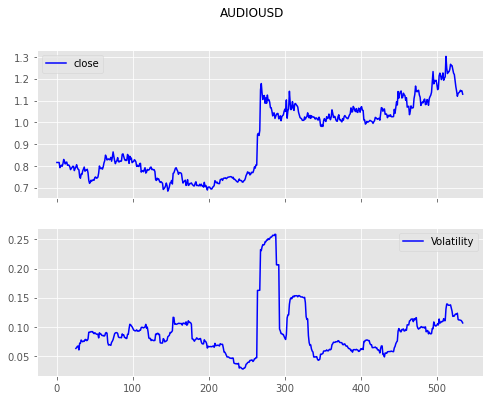

C:\Users\Cachorrito\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\CACHOR~1\AppData\Local\Temp/ipykernel_15180/90170632.py:69: RuntimeWarning: divide by zero encountered in log
  poly = polyfit(log(lags), log(tau), 1)


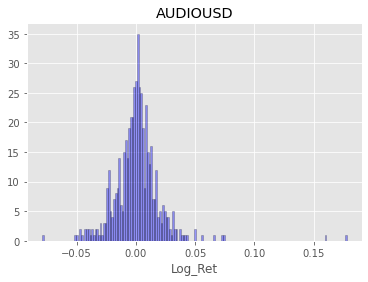

In [3]:
#Here we name the token pair we want to upload
Crypto = 'AUDIOUSD'

if __name__ == '__main__':
    
    import pandas as pd 
    url = 'https://raw.githubusercontent.com/The-Digital-Renaissance/analytics/master/data/historical_api/Kraken/AUDIOUSD_60.csv?token=GHSAT0AAAAAABU2VI6WMY3VZTCEUVEPA7SYYUN3Z2Q'
    DATA = pd.read_csv(url,delimiter=',', error_bad_lines=False)
    
    DATA.columns = ['timestamp', 'open', 'high', 'low', 'close', 'volume', 'kraken_trades']
       
    pd.core.common.is_list_like = pd.api.types.is_list_like
    import pandas_datareader.data as web 
    from datetime import date    
    import datetime as dt 
    import numpy as np 
    import matplotlib.pyplot as plt 
    from matplotlib import style 
    import seaborn as sns
    
    DATA['timestamp'] = DATA['timestamp'].apply(lambda x: dt.datetime.fromtimestamp(x))
    
    style.use('ggplot') 
    
    DATA['DIFFERENTIAL'] = (DATA['close'] - DATA['close'].shift(1))
    returns = DATA['close'].astype(float).pct_change() 
    
    DATA['Returns'] = returns
    # Compute the logarithmic returns using the Closing price 
    DATA['Log_Ret'] = np.log(DATA['close'] / DATA['close'].shift(1))
    # Compute Volatility using the pandas rolling standard deviation function
    DATA['Volatility'] = DATA['Log_Ret'].rolling(window=25).std() * np.sqrt(25)
    # Plot the index Price series and the Volatility
    DATA[['close', 'Volatility']].plot(subplots=True, color='blue',figsize=(8, 6), title=Crypto)
    plt.show()
    # Log returns histogram
    sns.distplot(DATA['Log_Ret'], hist=True, kde=False, 
                 bins=int(180/1), color = 'blue',
                 hist_kws={'edgecolor':'black'}).set_title(Crypto)
    
    # Average annualized Volatility for each index
    DATA_Average_annualized_Volatility = np.sqrt(25*DATA['Log_Ret'].var())
    
    # Skewness for each index
    DATA_Average_annualized_Skewness = DATA['Log_Ret'].skew()
    
    # Kurtosis for each index
    DATA_Average_annualized_Kurtosis = DATA['Log_Ret'].kurtosis()
    
    DATA_Average_annualized_returns = np.sqrt(25*DATA['Log_Ret'].mean())
    
    
    import statsmodels.tsa.stattools as ts
    #MEAN REVERSION TEST
    mean_reversion_Adfuller=ts.adfuller(DATA['close'], 1)
    
    from numpy import cumsum, log, polyfit, sqrt, std, subtract
    from numpy.random import randn
    
    def hurst(ts):
        """Returns the Hurst Exponent of the time series vector ts"""
        # Create the range of lag values
        lags = range(2, 100)
    
        # Calculate the array of the variances of the lagged differences
        tau = [sqrt(std(subtract(ts[lag:], ts[:-lag]))) for lag in lags]
    
        # Use a linear fit to estimate the Hurst Exponent
        poly = polyfit(log(lags), log(tau), 1)
    
        # Return the Hurst exponent from the polyfit output
        return poly[0]*2.0
    
    '''
    In addition to characterisation of the time series the Hurst Exponent also describes the extent to which a series behaves 
    in the manner categorised. For instance, a value of near 0 is a highly mean reverting series, while for near 1 the series 
    is strongly trending.'''
    
    Mean_reversion_Hurst = hurst(DATA['close'])

## Returns analysis

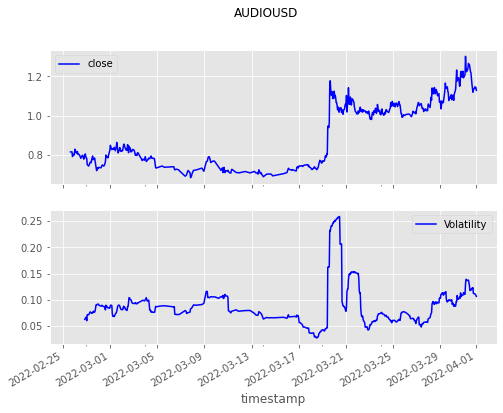

C:\Users\Cachorrito\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


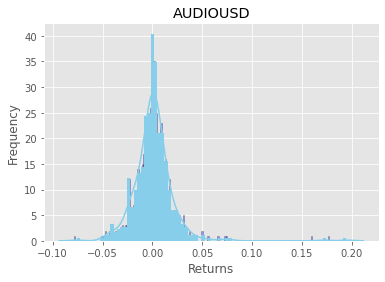

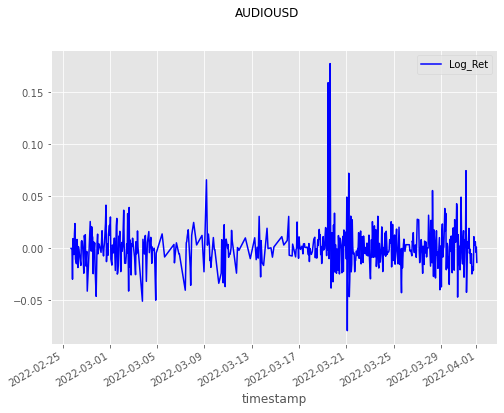

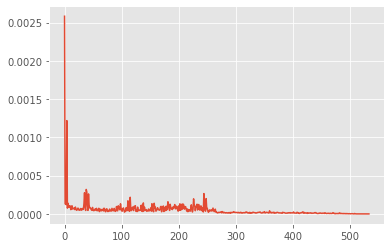

C:\Users\Cachorrito\anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
C:\Users\Cachorrito\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated

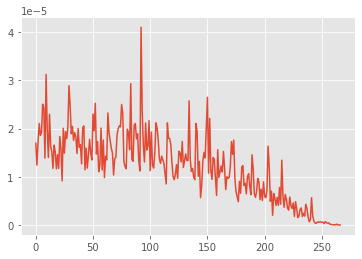

C:\Users\Cachorrito\anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
C:\Users\Cachorrito\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated

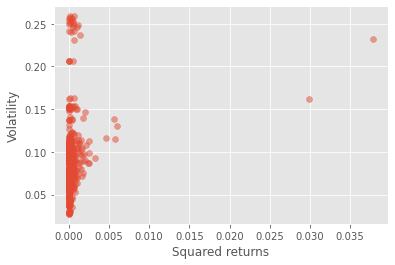

In [4]:
from scipy.stats import norm

from scipy.stats import spearmanr
from scipy.stats import kendalltau

import statsmodels.stats.diagnostic as sm
import statsmodels.api as smapi


import seaborn as sns
import matplotlib.pyplot as plt 
from matplotlib import style 
    
import numpy as np

DATA['timestamp'] = pd.to_datetime(DATA['timestamp'])
DATA = DATA.set_index('timestamp')


DATA[['close', 'Volatility']].plot(subplots=True, color='blue',figsize=(8, 6), title=Crypto)
plt.show()
# Log returns histogram
sns.distplot(DATA['Log_Ret'], hist=True, kde=False, bins=int(180/1), color = 'blue', hist_kws={'edgecolor':'black'}).set_title(Crypto)

#Distribution of returns
ax = sns.distplot(DATA['Returns'],
                  bins=80,
                  kde=True,
                  color='skyblue',
                  hist_kws={"linewidth": 15,'alpha':1})
ax.set(xlabel='Returns', ylabel='Frequency')

#Plot logarithmic returns
DATA[['Log_Ret']].plot(subplots=True, color='blue',figsize=(8, 6), title=Crypto)
plt.show()

DATA['Squared Returns'] = DATA['Returns']*DATA['Returns']

#Autocorrelation in squared returns
autocorrelation = np.correlate(DATA['Squared Returns'][1:], DATA['Squared Returns'][1:], mode="full")
autocorrelation = autocorrelation[autocorrelation.size//2:]
plt.plot(autocorrelation)
plt.show()

#perform Ljung-Box test on residuals with lag=5
res = smapi.tsa.ARMA(DATA['Squared Returns'][1:], (1,1)).fit(disp=-1)
sm.acorr_ljungbox(res.resid, lags=[5])

#Autocorrelation in returns
autocorrelation_returns = np.correlate(DATA['Returns'][1:], DATA['Returns'][1:], mode="full")
autocorrelation_returns = autocorrelation[autocorrelation.size//2:]
plt.plot(autocorrelation_returns)
plt.show()

#perform Ljung-Box test on residuals with lag=5
res = smapi.tsa.ARMA(DATA['Returns'][1:], (1,1)).fit(disp=-1)
sm.acorr_ljungbox(res.resid, lags=[5])


RETURNS_VOLATILITY_CORRELATION_PEARSON = np.corrcoef(DATA['Squared Returns'][25:], DATA['Volatility'][25:])
RETURNS_VOLATILITY_CORRELATION_SPEARMAN = spearmanr(DATA['Squared Returns'][25:], DATA['Volatility'][25:]) 
RETURNS_VOLATILITY_CORRELATION_KENDALL = kendalltau(DATA['Squared Returns'][25:], DATA['Volatility'][25:])

# Plot
plt.scatter(DATA['Squared Returns'][25:], DATA['Volatility'][25:], alpha=0.5)
plt.xlabel('Squared returns')
plt.ylabel('Volatility')
plt.show()

## Wiener filter

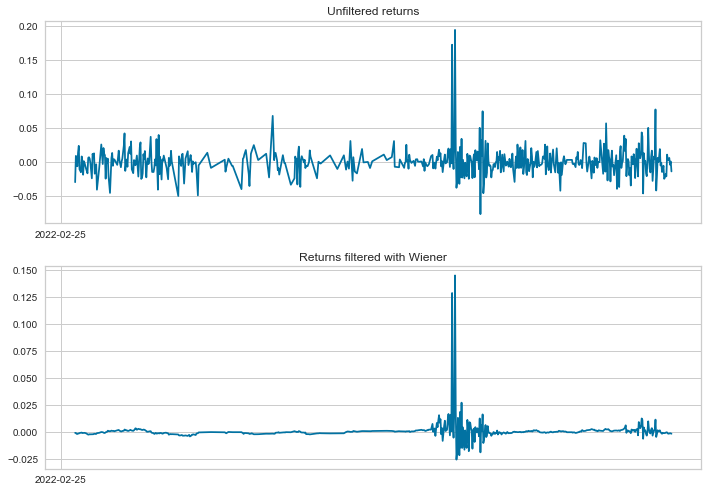

<Figure size 720x504 with 0 Axes>

In [16]:
#WIENER FILTER TO SMOOTH THE TIMESERIES DATA
DATA=DATA[1:]
import scipy
DATA['Returns_Wiener'] = scipy.signal.wiener(DATA['Returns'].dropna(), mysize = 50)
# Plot
fig, axes = plt.subplots(2, figsize=(10,7))
ax = axes[0]
ax.plot(DATA['Returns'])
ax.set(title='Unfiltered returns')
ax.set_xticks(ax.get_xticks()[::500])
ax = axes[1]
ax.plot(DATA['Returns_Wiener'])
ax.set(title='Returns filtered with Wiener')
ax.set_xticks(ax.get_xticks()[::500])
fig.tight_layout()


#WE FIT A MODEL NOW TO EXTRACT THE VARIANCE REGIMES IN THE TOKEN IN A WEEKLY TIMEFRAME
DATA_W = DATA[['close','Returns']]
DATA_W.drop('Returns', inplace=True, axis=1)
DATA_W = DATA_W.resample('W').last().pct_change().dropna() #Get weekly returns

#WE FIT A MODEL NOW TO EXTRACT THE VARIANCE REGIMES IN THE CRYPTO IN A TOKEN TIMEFRAME
DATA_W['WIENER_RETURNS'] = scipy.signal.wiener(DATA_W.dropna(), mysize = 50)
DATA_W = DATA_W.rename(columns={'close': 'Returns'})

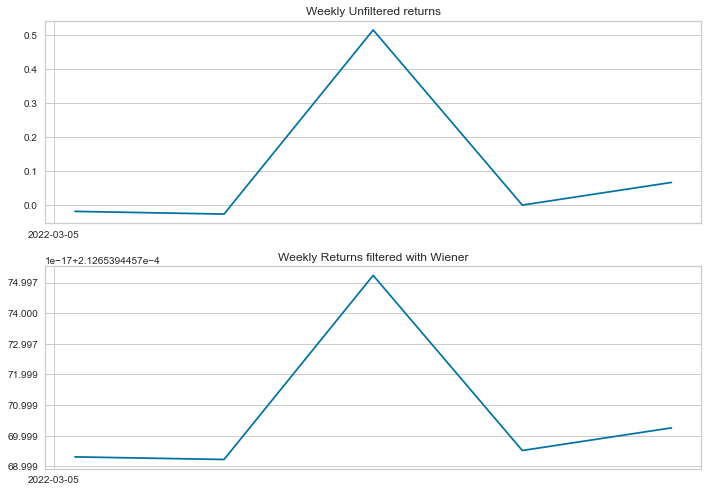

In [19]:
# Plot
fig, axes = plt.subplots(2, figsize=(10,7))
ax = axes[0]
ax.plot(DATA_W['Returns'])
ax.set(title='Weekly Unfiltered returns')
ax.set_xticks(ax.get_xticks()[::500])
ax = axes[1]
ax.plot(DATA_W['WIENER_RETURNS'])
ax.set(title='Weekly Returns filtered with Wiener')
ax.set_xticks(ax.get_xticks()[::500])
fig.tight_layout()

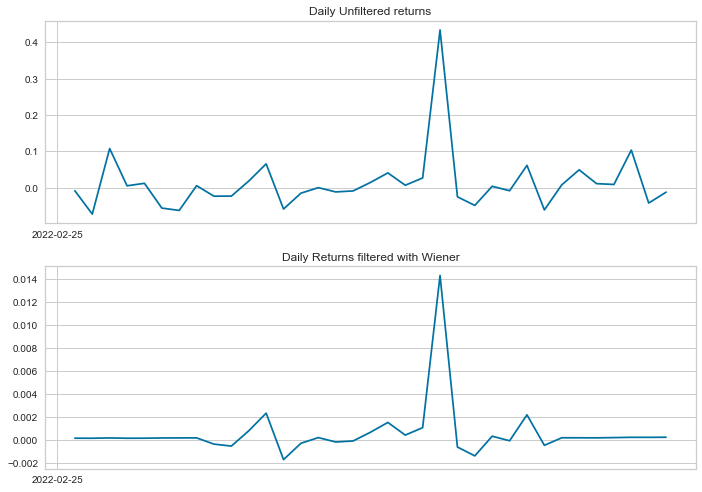

In [20]:
#WE FIT A MODEL NOW TO EXTRACT THE VARIANCE REGIMES IN THE TOKEN IN A WEEKLY TIMEFRAME
DATA_2 = DATA[['close','Returns']]
DATA_2.drop('Returns', inplace=True, axis=1)
DATA_2 = DATA_2.resample('D').last().pct_change().dropna() #Get daily returns

#WE FIT A MODEL NOW TO EXTRACT THE VARIANCE REGIMES IN THE CRYPTO IN A TOKEN TIMEFRAME
DATA_2['WIENER_RETURNS'] = scipy.signal.wiener(DATA_2.dropna(), mysize = 50)
DATA_2 = DATA_2.rename(columns={'close': 'Returns'})

# Plot
fig, axes = plt.subplots(2, figsize=(10,7))
ax = axes[0]
ax.plot(DATA_2['Returns'])
ax.set(title='Daily Unfiltered returns')
ax.set_xticks(ax.get_xticks()[::500])
ax = axes[1]
ax.plot(DATA_2['WIENER_RETURNS'])
ax.set(title='Daily Returns filtered with Wiener')
ax.set_xticks(ax.get_xticks()[::500])
fig.tight_layout()

## We analyse the amount of clusters/regimes with a K-Means and a K-Medoids method for weekly timewindows

In [6]:
'''We develop here the approach suggested by Kim, Nelson, and Startz (1998) Three-state Variance Switching
https://www.statsmodels.org/dev/examples/notebooks/generated/markov_autoregression.html'''
#EXPECTED RETURN ACCORDING TO MARKOV SWITCHING REGIMES WEEKLY

from statsmodels.tsa.stattools import adfuller

'''https://www.analyticsvidhya.com/blog/2019/10/regime-shift-models-time-series-modeling-financial-markets/'''

ADFULLER_TEST_W = adfuller(DATA_W['Returns'].dropna())

#HERE WE CALCULATE THE NUMBER OF STATES USING A KMEANS AND THE ELBOW RULE
from sklearn.cluster import KMeans
from yellowbrick.cluster.elbow import kelbow_visualizer

ELBOW_W = kelbow_visualizer(KMeans(random_state=5), DATA_W['Returns'].values.reshape(-1, 1), k=(1,10)).elbow_value_

C:\Users\Cachorrito\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Cachorrito\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Cachorrito\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Cachorrito\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a m

ValueError: n_samples=5 should be >= n_clusters=6.

In [7]:
#WE PERFORM HERE A K MEDOIDS FOR WEEKLY TIMEFRAMES
from sklearn_extra.cluster import KMedoids

from sklearn.metrics import silhouette_samples, silhouette_score

from sklearn.metrics import davies_bouldin_score 

#Silhouette score
sw_w = []
#Davies–Bouldin index (DB Index)
DBI_w = []

for i in range(2, 10):
    kMedoids = KMedoids(n_clusters = i, random_state = 0)
    kMedoids.fit(DATA_W['Returns'].values.reshape(-1, 1))
    y_kmed = kMedoids.fit_predict(DATA_W['Returns'].values.reshape(-1, 1))
    silhouette_avg = silhouette_score(DATA_W['Returns'].values.reshape(-1, 1), y_kmed)
    labels = kMedoids.labels_ 
    DBI_avg = davies_bouldin_score(DATA_W['Returns'].values.reshape(-1, 1), labels)
    DBI_w.append(DBI_avg)
    sw_w.append(silhouette_avg)
    
plt.plot(range(2, 10), sw_w)
plt.title('Silhoute Score')
plt.xlabel('Number of clusters')
plt.ylabel('SW')      #within cluster sum of squares
plt.show()

plt.plot(range(2, 10), DBI_w)
plt.title('DB Index')
plt.xlabel('Number of clusters')
plt.ylabel('DBI')      #within cluster sum of squares
plt.show()


ValueError: Number of labels is 5. Valid values are 2 to n_samples - 1 (inclusive)

In [8]:
'''OTHER METHOD
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer

# Instantiate the clustering model and visualizer
model = KMeans()
visualizer = KElbowVisualizer(model, k=(1,12))

visualizer.fit(DATA_W['Returns'].values.reshape(-1, 1))        # Fit the data to the visualizer
visualizer.show()        # Finalize and render the figure
'''

mod_kns_W = smapi.tsa.MarkovRegression(DATA_W['Returns'].dropna(), k_regimes=ELBOW_W, trend='nc', switching_variance=True)
res_kns_W = mod_kns_W.fit()
res_kns_W.summary()

NameError: name 'ELBOW_W' is not defined

In [9]:
fig, axes = plt.subplots(ELBOW_W + 1, figsize=(10,7))
ax = axes[0]
ax.plot(res_kns_W.smoothed_marginal_probabilities[0])
ax.set(title='Smoothed probability of a low-variance regime for token returns')
ax = axes[1]
ax.plot(res_kns_W.smoothed_marginal_probabilities[1])
ax.set(title='Smoothed probability of a medium-variance regime for token returns')
ax = axes[2]
ax.plot(res_kns_W.smoothed_marginal_probabilities[2])
ax.set(title='Smoothed probability of a high-variance regime for token returns')
ax = axes[ELBOW_W]
ax.plot(DATA_W['WIENER_RETURNS'])
ax.set(title='Wiener Returns')
fig.tight_layout()

frame_W = { 'LOW_VARIANCE': res_kns_W.smoothed_marginal_probabilities[0]
         , 'MED_VARIANCE': res_kns_W.smoothed_marginal_probabilities[1]
         , 'HIGH_VARIANCE': res_kns_W.smoothed_marginal_probabilities[2]} 

MARKOV_W = pd.DataFrame(frame_W)
MARKOV_W['DATE'] = MARKOV_W.index  

NameError: name 'ELBOW_W' is not defined

## We analyse the amount of clusters/regimes with a K-Means and a K-Medoids method for weekly timewindows

C:\Users\Cachorrito\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Cachorrito\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Cachorrito\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Cachorrito\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a m

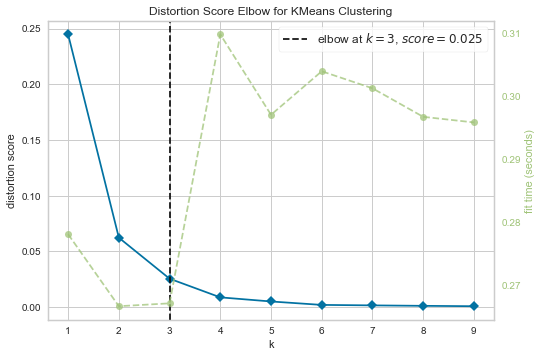

In [21]:
'''We develop here the approach suggested by Kim, Nelson, and Startz (1998) Three-state Variance Switching
https://www.statsmodels.org/dev/examples/notebooks/generated/markov_autoregression.html'''
#EXPECTED RETURN ACCORDING TO MARKOV SWITCHING REGIMES WEEKLY

from statsmodels.tsa.stattools import adfuller

'''https://www.analyticsvidhya.com/blog/2019/10/regime-shift-models-time-series-modeling-financial-markets/'''

ADFULLER_TEST = adfuller(DATA_2['Returns'].dropna())

#HERE WE CALCULATE THE NUMBER OF STATES USING A KMEANS AND THE ELBOW RULE
from sklearn.cluster import KMeans
from yellowbrick.cluster.elbow import kelbow_visualizer

ELBOW = kelbow_visualizer(KMeans(random_state=5), DATA_2['Returns'].values.reshape(-1, 1), k=(1,10)).elbow_value_

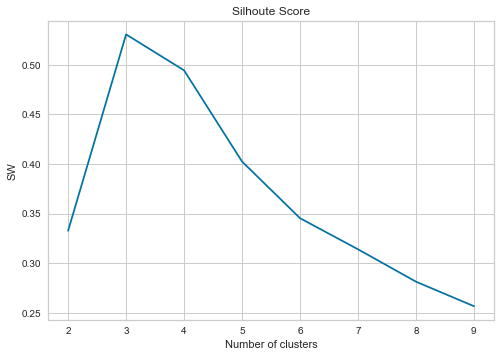

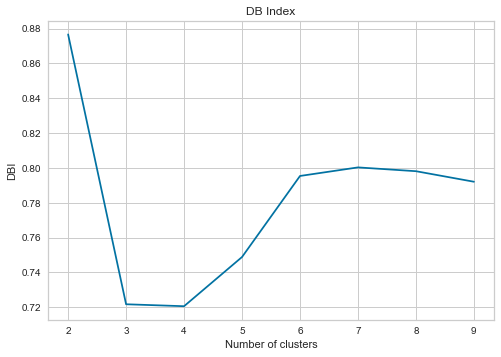

In [22]:
#WE PERFORM HERE A K MEDOIDS
from sklearn_extra.cluster import KMedoids

from sklearn.metrics import silhouette_samples, silhouette_score

from sklearn.metrics import davies_bouldin_score 

#Silhouette score
sw = []
#Davies–Bouldin index (DB Index)
DBI = []

for i in range(2, 10):
    kMedoids = KMedoids(n_clusters = i, random_state = 0)
    kMedoids.fit(DATA_2['Returns'].values.reshape(-1, 1))
    y_kmed = kMedoids.fit_predict(DATA_2['Returns'].values.reshape(-1, 1))
    silhouette_avg = silhouette_score(DATA_2['Returns'].values.reshape(-1, 1), y_kmed)
    labels = kMedoids.labels_ 
    DBI_avg = davies_bouldin_score(DATA_2['Returns'].values.reshape(-1, 1), labels)
    DBI.append(DBI_avg)
    sw.append(silhouette_avg)
    
plt.plot(range(2, 10), sw)
plt.title('Silhoute Score')
plt.xlabel('Number of clusters')
plt.ylabel('SW')      #within cluster sum of squares
plt.show()

plt.plot(range(2, 10), DBI)
plt.title('DB Index')
plt.xlabel('Number of clusters')
plt.ylabel('DBI')      #within cluster sum of squares
plt.show()


In [23]:
'''OTHER METHOD
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer

# Instantiate the clustering model and visualizer
model = KMeans()
visualizer = KElbowVisualizer(model, k=(1,12))

visualizer.fit(DATA_W['Returns'].values.reshape(-1, 1))        # Fit the data to the visualizer
visualizer.show()        # Finalize and render the figure
'''

mod_kns = smapi.tsa.MarkovRegression(DATA_2['Returns'].dropna(), k_regimes=ELBOW, trend='nc', switching_variance=True)
res_kns = mod_kns.fit()
res_kns.summary()

C:\Users\Cachorrito\anaconda3\lib\site-packages\statsmodels\tsa\regime_switching\markov_switching.py:1283: EstimationWarning: Invalid regime transition probabilities estimated in EM iteration; probabilities have been re-scaled to continue estimation.
  warnings.warn('Invalid regime transition probabilities'


<class 'statsmodels.iolib.summary.Summary'>
"""
                        Markov Switching Model Results                        
==============================================================================
Dep. Variable:                Returns   No. Observations:                   35
Model:               MarkovRegression   Log Likelihood                  56.674
Date:                Wed, 25 May 2022   AIC                            -95.347
Time:                        09:42:37   BIC                            -81.349
Sample:                    02-26-2022   HQIC                           -90.515
                         - 04-01-2022                                         
Covariance Type:               approx                                         
                             Regime 0 parameters                              
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2         0.0001      6e-05      1.842      0.065   -7.06e-06       0.000
                             Regime 1 parameters                              
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2         0.0025      0.001      3.068      0.002       0.001       0.004
                             Regime 2 parameters                              
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2         0.1426      0.190      0.750      0.453      -0.230       0.515
                         Regime transition parameters                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
p[0->0]        0.2271        nan        nan        nan         nan         nan
p[1->0]        0.3437      0.169      2.035      0.042       0.013       0.675
p[2->0]     5.014e-13        nan        nan        nan         nan         nan
p[0->1]        0.7729        nan        nan        nan         nan         nan
p[1->1]        0.6004      0.179      3.350      0.001       0.249       0.952
p[2->1]        1.0000        nan        nan        nan         nan         nan
==============================================================================

Warnings:
[1] Covariance matrix calculated using numerical (complex-step) differentiation.
"""

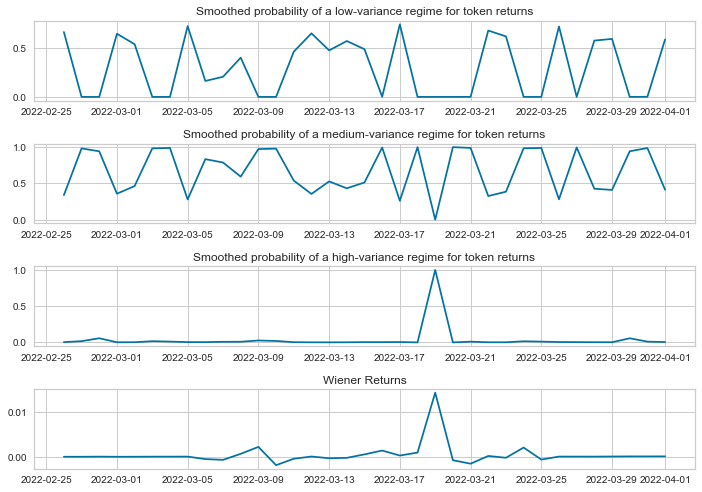

In [24]:
fig, axes = plt.subplots(ELBOW + 1, figsize=(10,7))
ax = axes[0]
ax.plot(res_kns.smoothed_marginal_probabilities[0])
ax.set(title='Smoothed probability of a low-variance regime for token returns')
ax = axes[1]
ax.plot(res_kns.smoothed_marginal_probabilities[1])
ax.set(title='Smoothed probability of a medium-variance regime for token returns')
ax = axes[2]
ax.plot(res_kns.smoothed_marginal_probabilities[2])
ax.set(title='Smoothed probability of a high-variance regime for token returns')
ax = axes[ELBOW]
ax.plot(DATA_2['WIENER_RETURNS'])
ax.set(title='Wiener Returns')
fig.tight_layout()

frame = { 'LOW_VARIANCE': res_kns.smoothed_marginal_probabilities[0]
         , 'MED_VARIANCE': res_kns.smoothed_marginal_probabilities[1]
         , 'HIGH_VARIANCE': res_kns.smoothed_marginal_probabilities[2]} 

MARKOV = pd.DataFrame(frame)
MARKOV['DATE'] = MARKOV.index  

## Jump analysis Weekly

C:\Users\Cachorrito\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


NameError: name 'ELBOW_W' is not defined

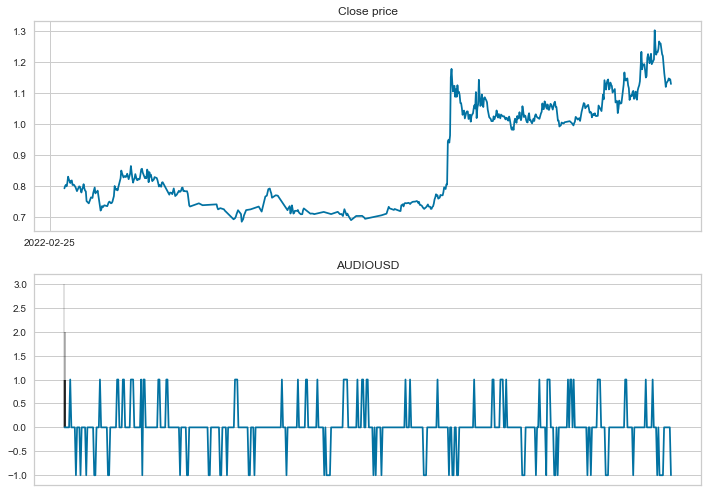

In [26]:
# Implementation of Jump Detection algorithm from https://stackoverflow.com/a/22640362/6029703
import numpy as np
import pylab

def thresholding_algo(y, lag, threshold, influence):
    signals = np.zeros(len(y))
    filteredY = np.array(y)
    avgFilter = [0]*len(y)
    stdFilter = [0]*len(y)
    avgFilter[lag - 1] = np.mean(y[0:lag])
    stdFilter[lag - 1] = np.std(y[0:lag])
    for i in range(lag, len(y)):
        if abs(y[i] - avgFilter[i-1]) > threshold * stdFilter [i-1]:
            if y[i] > avgFilter[i-1]:
                signals[i] = 1
            else:
                signals[i] = -1

            filteredY[i] = influence * y[i] + (1 - influence) * filteredY[i-1]
            avgFilter[i] = np.mean(filteredY[(i-lag+1):i+1])
            stdFilter[i] = np.std(filteredY[(i-lag+1):i+1])
        else:
            signals[i] = 0
            filteredY[i] = y[i]
            avgFilter[i] = np.mean(filteredY[(i-lag+1):i+1])
            stdFilter[i] = np.std(filteredY[(i-lag+1):i+1])

    return dict(signals = np.asarray(signals),
                avgFilter = np.asarray(avgFilter),
                stdFilter = np.asarray(stdFilter))


JUMPS = thresholding_algo(DATA['close'],5,3,0.5)

# Plot
fig, axes = plt.subplots(2, figsize=(10,7))
ax = axes[0]
ax.plot(DATA['close'])
ax.set(title='Close price')
ax.set_xticks(ax.get_xticks()[::500])
ax = axes[1]
ax.plot(JUMPS['signals'])
ax.set(title='Jumps')
ax.set_xticks(ax.get_xticks()[::500])
fig.tight_layout()

DATA['JUMPS_ALGORITHM'] = JUMPS['signals']

#LETS DO AN OUTLIER ANALYSIS USING 2 STD AS THRESHOLD
outliers=[]
JUMP_ID = []

def detect_outlier(data_1):
    
    threshold=2
    mean_1 = np.mean(data_1)
    std_1 =np.std(data_1)
    
    
    for y in data_1:
        z_score= (y - mean_1)/std_1 
        if np.abs(z_score) > threshold:
            outliers.append(y)
            JUMP_ID.append(1)
        else:
            JUMP_ID.append(0)
    return outliers

JUMPS = detect_outlier(DATA['Returns'])

# JUMPS HISTOGRAM
sns.distplot(np.abs(JUMPS), hist=True, kde=False, 
                 bins=int(180/1), color = 'blue',
                 hist_kws={'edgecolor':'black'}).set_title(Crypto)

sns.distplot(JUMPS, hist=True, kde=False, 
                 bins=int(180/1), color = 'blue',
                 hist_kws={'edgecolor':'black'}).set_title(Crypto)

DATA['JUMP_ID'] = JUMP_ID

fig, axes = plt.subplots(ELBOW_W + 2, figsize=(10,7))
ax = axes[0]
ax.plot(res_kns_W.smoothed_marginal_probabilities[0])
ax.set(title='Smoothed probability of a low-variance regime for token returns')
ax = axes[1]
ax.plot(res_kns_W.smoothed_marginal_probabilities[1])
ax.set(title='Smoothed probability of a medium-variance regime for token returns')
ax = axes[2]
ax.plot(res_kns_W.smoothed_marginal_probabilities[2])
ax.set(title='Smoothed probability of a high-variance regime for token returns')
ax = axes[ELBOW_W]
ax.plot(DATA_W['WIENER_RETURNS'])
ax.set(title='Wiener Returns Weekly')
ax = axes[ELBOW_W+1]
ax.plot(DATA['JUMP_ID'])
ax.set(title='Jumps')
fig.tight_layout()

NameError: name 'ELBOW_W' is not defined

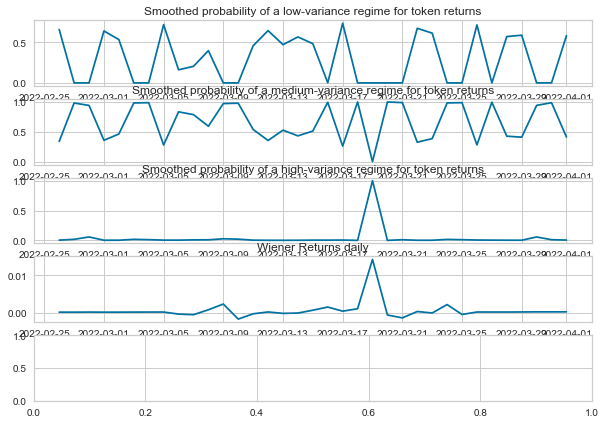

In [34]:
fig, axes = plt.subplots(ELBOW+2, figsize=(10,7))
ax = axes[0]
ax.plot(res_kns.smoothed_marginal_probabilities[0])
ax.set(title='Smoothed probability of a low-variance regime for token returns')
ax = axes[1]
ax.plot(res_kns.smoothed_marginal_probabilities[1])
ax.set(title='Smoothed probability of a medium-variance regime for token returns')
ax = axes[2]
ax.plot(res_kns.smoothed_marginal_probabilities[2])
ax.set(title='Smoothed probability of a high-variance regime for token returns')
ax = axes[ELBOW]
ax.plot(DATA_2['WIENER_RETURNS'])
ax.set(title='Wiener Returns daily')
ax = axes[ELBOW_W+1]
ax.plot(DATA['JUMP_ID'])
ax.set(title='Jumps')
fig.tight_layout()

(array([5., 4., 1., 3., 0., 1., 0., 0., 0., 1., 0., 2., 1., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 1.]),
 array([0.04020338, 0.04329045, 0.04637753, 0.0494646 , 0.05255167,
        0.05563874, 0.05872581, 0.06181288, 0.06489996, 0.06798703,
        0.0710741 , 0.07416117, 0.07724824, 0.08033532, 0.08342239,
        0.08650946, 0.08959653, 0.0926836 , 0.09577068, 0.09885775,
        0.10194482, 0.10503189, 0.10811896, 0.11120603, 0.11429311,
        0.11738018, 0.12046725, 0.12355432, 0.12664139, 0.12972847,
        0.13281554, 0.13590261, 0.13898968, 0.14207675, 0.14516383,
        0.1482509 , 0.15133797, 0.15442504, 0.15751211, 0.16059918,
        0.16368626, 0.16677333, 0.1698604 , 0.17294747, 0.17603454,
        0.17912162, 0.18220869, 0.18529576, 0.18838283, 0.1914699 ,
        0.19455698]),
 <BarContainer object of 50 artists>)

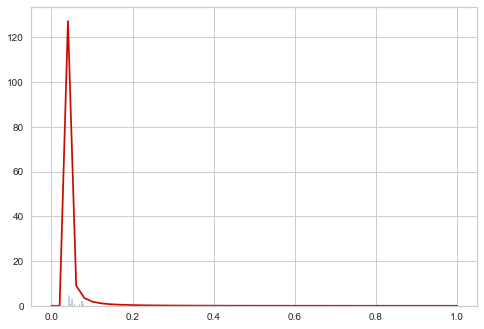

In [35]:
#WE FIT THE JUMP DISTRIBUTION TO A LOG-NORMAL DENSITY FUNCTION
import scipy.stats as sts
samp = np.abs(JUMPS)
param=sts.lognorm.fit(samp)# fit the sample data
x=np.linspace(0,1,50)
pdf_fitted = sts.lognorm.pdf(x, param[0], loc=param[1], scale=param[2]) # fitted distribution
plt.plot(x,pdf_fitted,'r-')
plt.hist(samp,bins=50,alpha=.3)

In [29]:
#WE COMPUTE NOW ALL THE PARAMETERS NEEDED  FOR THE WHOLE DATASERIES

JUMP_PROBABILITY_ABSOLUTE = len(JUMPS)/len(DATA) #WE HAVE TO MULTIPLY BY THE NUMBER OF STEPS (DAYS) TO GET THE LAMBDA VALUE

ALFA_MEAN_JUMP = np.abs(JUMPS).mean()
ALFA_MEAN_LOG_JUMP = np.abs(DATA[DATA['JUMP_ID']==1]['Log_Ret']).mean()

BETA_STD_JUMP = np.abs(JUMPS).std()
BETA_STD_LOG_JUMP = np.abs(DATA[DATA['JUMP_ID']==1]['Log_Ret']).std()

#WE COMPUTE NOW ALL THE PARAMETERS NEEDED  FOR THE MARKOV REGIME SWITCHING MODEL
#FIRST WE FILTER THE DATA BY MARKOV REGIME

DATA['REGIME'] = None
for i in range(0,len(res_kns.smoothed_marginal_probabilities[0])):
    if (res_kns.smoothed_marginal_probabilities[0][i] > res_kns.smoothed_marginal_probabilities[1][i]) and (res_kns.smoothed_marginal_probabilities[0][i] > res_kns.smoothed_marginal_probabilities[2][i]):
       DATA['REGIME'].iloc[i] = 1
    elif (res_kns.smoothed_marginal_probabilities[1][i] > res_kns.smoothed_marginal_probabilities[0][i]) and (res_kns.smoothed_marginal_probabilities[1][i] > res_kns.smoothed_marginal_probabilities[2][i]):
       DATA['REGIME'].iloc[i] = 2
    else:
       DATA['REGIME'].iloc[i] = 3

DATA['DATE'] = DATA.index       
       
DATA['REGIME_W'] = None
for i in range(0,len(MARKOV_W)):
    if i == 0:
       if (MARKOV_W['LOW_VARIANCE'][i] > MARKOV_W['MED_VARIANCE'][i]) and (MARKOV_W['LOW_VARIANCE'][i] > MARKOV_W['HIGH_VARIANCE'][i]):   
            DATA['REGIME_W'].iloc[np.where((DATA['DATE'] <= MARKOV_W['DATE'][i]))[0]] = 1
       elif (MARKOV_W['MED_VARIANCE'][i] > MARKOV_W['LOW_VARIANCE'][i]) and (MARKOV_W['MED_VARIANCE'][i] > MARKOV_W['HIGH_VARIANCE'][i]):
           DATA['REGIME_W'].iloc[np.where((DATA['DATE'] <= MARKOV_W['DATE'][i]))[0]] = 2
       else:
           DATA['REGIME_W'].iloc[np.where((DATA['DATE'] <= MARKOV_W['DATE'][i]))[0]] = 3
    elif (MARKOV_W['LOW_VARIANCE'][i] > MARKOV_W['MED_VARIANCE'][i]) and (MARKOV_W['LOW_VARIANCE'][i] > MARKOV_W['HIGH_VARIANCE'][i]):   
       DATA['REGIME_W'].iloc[np.where((DATA['DATE'] <= MARKOV_W['DATE'][i]) & (DATA['DATE'] >= MARKOV_W['DATE'][i-1]))[0]] = 1
    elif (MARKOV_W['MED_VARIANCE'][i] > MARKOV_W['LOW_VARIANCE'][i]) and (MARKOV_W['MED_VARIANCE'][i] > MARKOV_W['HIGH_VARIANCE'][i]):
       DATA['REGIME_W'].iloc[np.where((DATA['DATE'] <= MARKOV_W['DATE'][i]) & (DATA['DATE'] >= MARKOV_W['DATE'][i-1]))[0]] = 2
    else:
       DATA['REGIME_W'].iloc[np.where((DATA['DATE'] <= MARKOV_W['DATE'][i]) & (DATA['DATE'] >= MARKOV_W['DATE'][i-1]))[0]] = 3


JUMP_PROBABILITY_REGIME1 = len(DATA[(DATA['JUMP_ID']==1) & (DATA['REGIME_W']==1)])/len(DATA[DATA['REGIME_W']==1]) 
JUMP_PROBABILITY_REGIME2 = len(DATA[(DATA['JUMP_ID']==1) & (DATA['REGIME_W']==2)])/len(DATA[DATA['REGIME_W']==2]) 
JUMP_PROBABILITY_REGIME3 = len(DATA[(DATA['JUMP_ID']==1) & (DATA['REGIME_W']==3)])/len(DATA[DATA['REGIME_W']==3]) 

ALFA_MEAN_JUMP_REGIME1 = np.abs(DATA[(DATA['JUMP_ID']==1) & (DATA['REGIME_W']==1)]['Returns']).mean()
ALFA_MEAN_JUMP_REGIME2 = np.abs(DATA[(DATA['JUMP_ID']==1) & (DATA['REGIME_W']==2)]['Returns']).mean()
ALFA_MEAN_JUMP_REGIME3 = np.abs(DATA[(DATA['JUMP_ID']==1) & (DATA['REGIME_W']==3)]['Returns']).mean()

ALFA_MEAN_LOG_JUMP_REGIME1 = np.abs(DATA[(DATA['JUMP_ID']==1) & (DATA['REGIME_W']==1)]['Log_Ret']).mean()
ALFA_MEAN_LOG_JUMP_REGIME2 = np.abs(DATA[(DATA['JUMP_ID']==1) & (DATA['REGIME_W']==2)]['Log_Ret']).mean()
ALFA_MEAN_LOG_JUMP_REGIME3 = np.abs(DATA[(DATA['JUMP_ID']==1) & (DATA['REGIME_W']==3)]['Log_Ret']).mean()

BETA_STD_JUMP_REGIME1 = np.abs(DATA[(DATA['JUMP_ID']==1) & (DATA['REGIME_W']==1)]['Returns']).std()
BETA_STD_JUMP_REGIME2 = np.abs(DATA[(DATA['JUMP_ID']==1) & (DATA['REGIME_W']==2)]['Returns']).std()
BETA_STD_JUMP_REGIME3 = np.abs(DATA[(DATA['JUMP_ID']==1) & (DATA['REGIME_W']==3)]['Returns']).std()

BETA_STD_LOG_JUMP_REGIME1 = np.abs(DATA[(DATA['JUMP_ID']==1) & (DATA['REGIME_W']==1)]['Log_Ret']).std()
BETA_STD_LOG_JUMP_REGIME2 = np.abs(DATA[(DATA['JUMP_ID']==1) & (DATA['REGIME_W']==2)]['Log_Ret']).std()
BETA_STD_LOG_JUMP_REGIME3 = np.abs(DATA[(DATA['JUMP_ID']==1) & (DATA['REGIME_W']==3)]['Log_Ret']).std()

MEAN_RETURN_MU_REGIME1 = np.abs(DATA[(DATA['JUMP_ID']==0) & (DATA['REGIME_W']==1)]['Returns']).mean()
MEAN_RETURN_MU_REGIME2 = np.abs(DATA[(DATA['JUMP_ID']==0) & (DATA['REGIME_W']==2)]['Returns']).mean()
MEAN_RETURN_MU_REGIME3 = np.abs(DATA[(DATA['JUMP_ID']==0) & (DATA['REGIME_W']==3)]['Returns']).mean()

ALFA_MEAN_JUMP_REGIME1 = ALFA_MEAN_JUMP_REGIME1 - MEAN_RETURN_MU_REGIME1
ALFA_MEAN_JUMP_REGIME2 = ALFA_MEAN_JUMP_REGIME2 - MEAN_RETURN_MU_REGIME2
ALFA_MEAN_JUMP_REGIME3 = ALFA_MEAN_JUMP_REGIME3 - MEAN_RETURN_MU_REGIME3

C:\Users\Cachorrito\anaconda3\lib\site-packages\pandas\core\indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


NameError: name 'MARKOV_W' is not defined

In [ ]:
#WE FIT THE JUMP DISTRIBUTION TO A LOG-NORMAL DENSITY FUNCTION FOR EACH REGIME
JUMP_SIZE_REGIME1 = np.random.lognormal(mean=ALFA_MEAN_JUMP_REGIME1, sigma=BETA_STD_JUMP_REGIME1, size=10000)-1
JUMP_SIZE_REGIME1 = np.concatenate((JUMP_SIZE_REGIME1, JUMP_SIZE_REGIME1*(-1)), axis=0)
plt.hist(JUMP_SIZE_REGIME1,bins=50,alpha=.3)

JUMP_SIZE_REGIME2 = np.random.lognormal(mean=ALFA_MEAN_JUMP_REGIME2, sigma=BETA_STD_JUMP_REGIME2, size=10000)-1
JUMP_SIZE_REGIME2 = np.concatenate((JUMP_SIZE_REGIME2, JUMP_SIZE_REGIME2*(-1)), axis=0)
plt.hist(JUMP_SIZE_REGIME2,bins=50,alpha=.3)

JUMP_SIZE_REGIME3 = np.random.lognormal(mean=ALFA_MEAN_JUMP_REGIME3, sigma=BETA_STD_JUMP_REGIME3, size=10000)-1
JUMP_SIZE_REGIME3 = np.concatenate((JUMP_SIZE_REGIME3, JUMP_SIZE_REGIME3*(-1)), axis=0)
plt.hist(JUMP_SIZE_REGIME3,bins=50,alpha=.3)

## Jump analysis Daily

C:\Users\Cachorrito\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


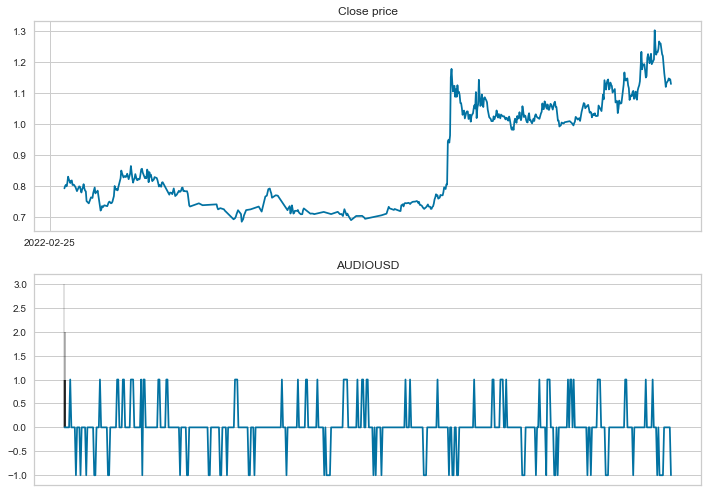

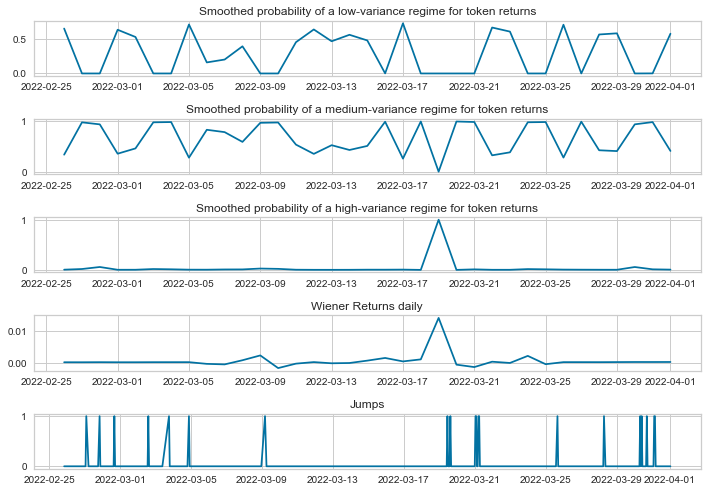

In [36]:
# Implementation of Jump Detection algorithm from https://stackoverflow.com/a/22640362/6029703
import numpy as np
import pylab

def thresholding_algo(y, lag, threshold, influence):
    signals = np.zeros(len(y))
    filteredY = np.array(y)
    avgFilter = [0]*len(y)
    stdFilter = [0]*len(y)
    avgFilter[lag - 1] = np.mean(y[0:lag])
    stdFilter[lag - 1] = np.std(y[0:lag])
    for i in range(lag, len(y)):
        if abs(y[i] - avgFilter[i-1]) > threshold * stdFilter [i-1]:
            if y[i] > avgFilter[i-1]:
                signals[i] = 1
            else:
                signals[i] = -1

            filteredY[i] = influence * y[i] + (1 - influence) * filteredY[i-1]
            avgFilter[i] = np.mean(filteredY[(i-lag+1):i+1])
            stdFilter[i] = np.std(filteredY[(i-lag+1):i+1])
        else:
            signals[i] = 0
            filteredY[i] = y[i]
            avgFilter[i] = np.mean(filteredY[(i-lag+1):i+1])
            stdFilter[i] = np.std(filteredY[(i-lag+1):i+1])

    return dict(signals = np.asarray(signals),
                avgFilter = np.asarray(avgFilter),
                stdFilter = np.asarray(stdFilter))


JUMPS = thresholding_algo(DATA['close'],5,3,0.5)

# Plot
fig, axes = plt.subplots(2, figsize=(10,7))
ax = axes[0]
ax.plot(DATA['close'])
ax.set(title='Close price')
ax.set_xticks(ax.get_xticks()[::500])
ax = axes[1]
ax.plot(JUMPS['signals'])
ax.set(title='Jumps')
ax.set_xticks(ax.get_xticks()[::500])
fig.tight_layout()

DATA['JUMPS_ALGORITHM'] = JUMPS['signals']

#LETS DO AN OUTLIER ANALYSIS USING 2 STD AS THRESHOLD
outliers=[]
JUMP_ID = []

def detect_outlier(data_1):
    
    threshold=2
    mean_1 = np.mean(data_1)
    std_1 =np.std(data_1)
    
    
    for y in data_1:
        z_score= (y - mean_1)/std_1 
        if np.abs(z_score) > threshold:
            outliers.append(y)
            JUMP_ID.append(1)
        else:
            JUMP_ID.append(0)
    return outliers

JUMPS = detect_outlier(DATA['Returns'])

# JUMPS HISTOGRAM
sns.distplot(np.abs(JUMPS), hist=True, kde=False, 
                 bins=int(180/1), color = 'blue',
                 hist_kws={'edgecolor':'black'}).set_title(Crypto)

sns.distplot(JUMPS, hist=True, kde=False, 
                 bins=int(180/1), color = 'blue',
                 hist_kws={'edgecolor':'black'}).set_title(Crypto)

DATA['JUMP_ID'] = JUMP_ID

fig, axes = plt.subplots(ELBOW + 2, figsize=(10,7))
ax = axes[0]
ax.plot(res_kns.smoothed_marginal_probabilities[0])
ax.set(title='Smoothed probability of a low-variance regime for token returns')
ax = axes[1]
ax.plot(res_kns.smoothed_marginal_probabilities[1])
ax.set(title='Smoothed probability of a medium-variance regime for token returns')
ax = axes[2]
ax.plot(res_kns.smoothed_marginal_probabilities[2])
ax.set(title='Smoothed probability of a high-variance regime for token returns')
ax = axes[ELBOW]
ax.plot(DATA_2['WIENER_RETURNS'])
ax.set(title='Wiener Returns daily')
ax = axes[ELBOW+1]
ax.plot(DATA['JUMP_ID'])
ax.set(title='Jumps')
fig.tight_layout()

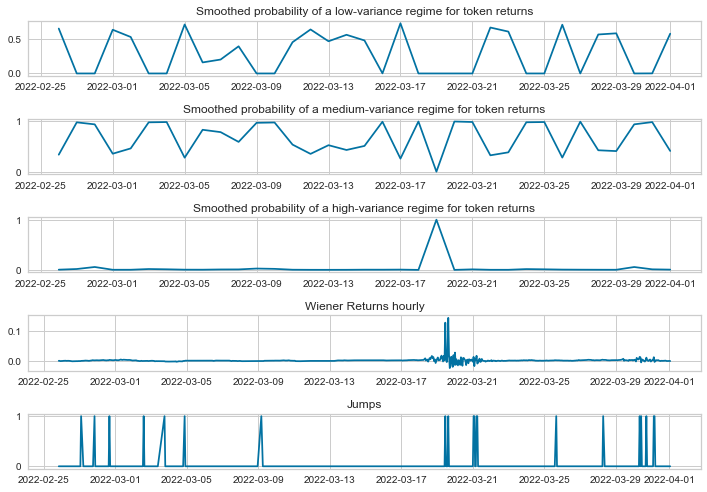

In [37]:
fig, axes = plt.subplots(ELBOW+2, figsize=(10,7))
ax = axes[0]
ax.plot(res_kns.smoothed_marginal_probabilities[0])
ax.set(title='Smoothed probability of a low-variance regime for token returns')
ax = axes[1]
ax.plot(res_kns.smoothed_marginal_probabilities[1])
ax.set(title='Smoothed probability of a medium-variance regime for token returns')
ax = axes[2]
ax.plot(res_kns.smoothed_marginal_probabilities[2])
ax.set(title='Smoothed probability of a high-variance regime for token returns')
ax = axes[ELBOW]
ax.plot(DATA['Returns_Wiener'])
ax.set(title='Wiener Returns hourly')
ax = axes[ELBOW+1]
ax.plot(DATA['JUMP_ID'])
ax.set(title='Jumps')
fig.tight_layout()

(array([5., 4., 1., 3., 0., 1., 0., 0., 0., 1., 0., 2., 1., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 1.]),
 array([0.04020338, 0.04329045, 0.04637753, 0.0494646 , 0.05255167,
        0.05563874, 0.05872581, 0.06181288, 0.06489996, 0.06798703,
        0.0710741 , 0.07416117, 0.07724824, 0.08033532, 0.08342239,
        0.08650946, 0.08959653, 0.0926836 , 0.09577068, 0.09885775,
        0.10194482, 0.10503189, 0.10811896, 0.11120603, 0.11429311,
        0.11738018, 0.12046725, 0.12355432, 0.12664139, 0.12972847,
        0.13281554, 0.13590261, 0.13898968, 0.14207675, 0.14516383,
        0.1482509 , 0.15133797, 0.15442504, 0.15751211, 0.16059918,
        0.16368626, 0.16677333, 0.1698604 , 0.17294747, 0.17603454,
        0.17912162, 0.18220869, 0.18529576, 0.18838283, 0.1914699 ,
        0.19455698]),
 <BarContainer object of 50 artists>)

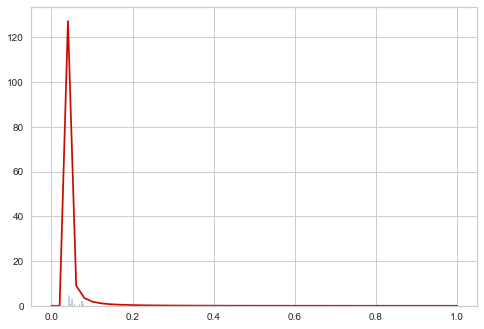

In [38]:
#WE FIT THE JUMP DISTRIBUTION TO A LOG-NORMAL DENSITY FUNCTION
import scipy.stats as sts
samp = np.abs(JUMPS)
param=sts.lognorm.fit(samp)# fit the sample data
x=np.linspace(0,1,50)
pdf_fitted = sts.lognorm.pdf(x, param[0], loc=param[1], scale=param[2]) # fitted distribution
plt.plot(x,pdf_fitted,'r-')
plt.hist(samp,bins=50,alpha=.3)

In [39]:
#WE COMPUTE NOW ALL THE PARAMETERS NEEDED  FOR THE WHOLE DATASERIES

JUMP_PROBABILITY_ABSOLUTE = len(JUMPS)/len(DATA) #WE HAVE TO MULTIPLY BY THE NUMBER OF STEPS (DAYS) TO GET THE LAMBDA VALUE

ALFA_MEAN_JUMP = np.abs(JUMPS).mean()
ALFA_MEAN_LOG_JUMP = np.abs(DATA[DATA['JUMP_ID']==1]['Log_Ret']).mean()

BETA_STD_JUMP = np.abs(JUMPS).std()
BETA_STD_LOG_JUMP = np.abs(DATA[DATA['JUMP_ID']==1]['Log_Ret']).std()

#WE COMPUTE NOW ALL THE PARAMETERS NEEDED  FOR THE MARKOV REGIME SWITCHING MODEL
#FIRST WE FILTER THE DATA BY MARKOV REGIME

DATA['REGIME'] = None
for i in range(0,len(res_kns.smoothed_marginal_probabilities[0])):
    if (res_kns.smoothed_marginal_probabilities[0][i] > res_kns.smoothed_marginal_probabilities[1][i]) and (res_kns.smoothed_marginal_probabilities[0][i] > res_kns.smoothed_marginal_probabilities[2][i]):
       DATA['REGIME'].iloc[i] = 1
    elif (res_kns.smoothed_marginal_probabilities[1][i] > res_kns.smoothed_marginal_probabilities[0][i]) and (res_kns.smoothed_marginal_probabilities[1][i] > res_kns.smoothed_marginal_probabilities[2][i]):
       DATA['REGIME'].iloc[i] = 2
    else:
       DATA['REGIME'].iloc[i] = 3

DATA['DATE'] = DATA.index       
       
DATA['REGIME'] = None
for i in range(0,len(MARKOV)):
    if i == 0:
       if (MARKOV['LOW_VARIANCE'][i] > MARKOV['MED_VARIANCE'][i]) and (MARKOV['LOW_VARIANCE'][i] > MARKOV['HIGH_VARIANCE'][i]):   
            DATA['REGIME'].iloc[np.where((DATA['DATE'] <= MARKOV['DATE'][i]))[0]] = 1
       elif (MARKOV['MED_VARIANCE'][i] > MARKOV['LOW_VARIANCE'][i]) and (MARKOV['MED_VARIANCE'][i] > MARKOV['HIGH_VARIANCE'][i]):
           DATA['REGIME'].iloc[np.where((DATA['DATE'] <= MARKOV['DATE'][i]))[0]] = 2
       else:
           DATA['REGIME'].iloc[np.where((DATA['DATE'] <= MARKOV['DATE'][i]))[0]] = 3
    elif (MARKOV['LOW_VARIANCE'][i] > MARKOV['MED_VARIANCE'][i]) and (MARKOV['LOW_VARIANCE'][i] > MARKOV['HIGH_VARIANCE'][i]):   
       DATA['REGIME'].iloc[np.where((DATA['DATE'] <= MARKOV['DATE'][i]) & (DATA['DATE'] >= MARKOV['DATE'][i-1]))[0]] = 1
    elif (MARKOV['MED_VARIANCE'][i] > MARKOV['LOW_VARIANCE'][i]) and (MARKOV['MED_VARIANCE'][i] > MARKOV['HIGH_VARIANCE'][i]):
       DATA['REGIME'].iloc[np.where((DATA['DATE'] <= MARKOV['DATE'][i]) & (DATA['DATE'] >= MARKOV['DATE'][i-1]))[0]] = 2
    else:
       DATA['REGIME'].iloc[np.where((DATA['DATE'] <= MARKOV['DATE'][i]) & (DATA['DATE'] >= MARKOV['DATE'][i-1]))[0]] = 3


JUMP_PROBABILITY_REGIME1 = len(DATA[(DATA['JUMP_ID']==1) & (DATA['REGIME']==1)])/len(DATA[DATA['REGIME']==1]) 
JUMP_PROBABILITY_REGIME2 = len(DATA[(DATA['JUMP_ID']==1) & (DATA['REGIME']==2)])/len(DATA[DATA['REGIME']==2]) 
JUMP_PROBABILITY_REGIME3 = len(DATA[(DATA['JUMP_ID']==1) & (DATA['REGIME']==3)])/len(DATA[DATA['REGIME']==3]) 

ALFA_MEAN_JUMP_REGIME1 = np.abs(DATA[(DATA['JUMP_ID']==1) & (DATA['REGIME']==1)]['Returns']).mean()
ALFA_MEAN_JUMP_REGIME2 = np.abs(DATA[(DATA['JUMP_ID']==1) & (DATA['REGIME']==2)]['Returns']).mean()
ALFA_MEAN_JUMP_REGIME3 = np.abs(DATA[(DATA['JUMP_ID']==1) & (DATA['REGIME']==3)]['Returns']).mean()

ALFA_MEAN_LOG_JUMP_REGIME1 = np.abs(DATA[(DATA['JUMP_ID']==1) & (DATA['REGIME']==1)]['Log_Ret']).mean()
ALFA_MEAN_LOG_JUMP_REGIME2 = np.abs(DATA[(DATA['JUMP_ID']==1) & (DATA['REGIME']==2)]['Log_Ret']).mean()
ALFA_MEAN_LOG_JUMP_REGIME3 = np.abs(DATA[(DATA['JUMP_ID']==1) & (DATA['REGIME']==3)]['Log_Ret']).mean()

BETA_STD_JUMP_REGIME1 = np.abs(DATA[(DATA['JUMP_ID']==1) & (DATA['REGIME']==1)]['Returns']).std()
BETA_STD_JUMP_REGIME2 = np.abs(DATA[(DATA['JUMP_ID']==1) & (DATA['REGIME']==2)]['Returns']).std()
BETA_STD_JUMP_REGIME3 = np.abs(DATA[(DATA['JUMP_ID']==1) & (DATA['REGIME']==3)]['Returns']).std()

BETA_STD_LOG_JUMP_REGIME1 = np.abs(DATA[(DATA['JUMP_ID']==1) & (DATA['REGIME']==1)]['Log_Ret']).std()
BETA_STD_LOG_JUMP_REGIME2 = np.abs(DATA[(DATA['JUMP_ID']==1) & (DATA['REGIME']==2)]['Log_Ret']).std()
BETA_STD_LOG_JUMP_REGIME3 = np.abs(DATA[(DATA['JUMP_ID']==1) & (DATA['REGIME']==3)]['Log_Ret']).std()

MEAN_RETURN_MU_REGIME1 = np.abs(DATA[(DATA['JUMP_ID']==0) & (DATA['REGIME']==1)]['Returns']).mean()
MEAN_RETURN_MU_REGIME2 = np.abs(DATA[(DATA['JUMP_ID']==0) & (DATA['REGIME']==2)]['Returns']).mean()
MEAN_RETURN_MU_REGIME3 = np.abs(DATA[(DATA['JUMP_ID']==0) & (DATA['REGIME']==3)]['Returns']).mean()

ALFA_MEAN_JUMP_REGIME1 = ALFA_MEAN_JUMP_REGIME1 - MEAN_RETURN_MU_REGIME1
ALFA_MEAN_JUMP_REGIME2 = ALFA_MEAN_JUMP_REGIME2 - MEAN_RETURN_MU_REGIME2
ALFA_MEAN_JUMP_REGIME3 = ALFA_MEAN_JUMP_REGIME3 - MEAN_RETURN_MU_REGIME3

C:\Users\Cachorrito\anaconda3\lib\site-packages\pandas\core\indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


C:\Users\Cachorrito\anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6731: RuntimeWarning: All-NaN slice encountered
  xmin = min(xmin, np.nanmin(xi))
C:\Users\Cachorrito\anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6732: RuntimeWarning: All-NaN slice encountered
  xmax = max(xmax, np.nanmax(xi))


ValueError: autodetected range of [nan, nan] is not finite

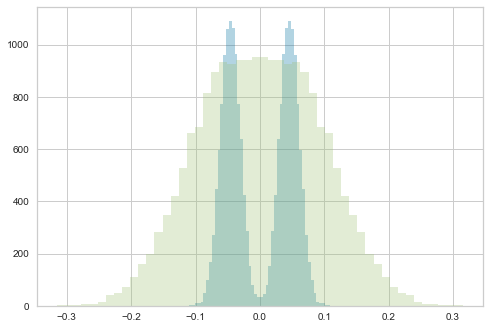

In [40]:
#WE FIT THE JUMP DISTRIBUTION TO A LOG-NORMAL DENSITY FUNCTION FOR EACH REGIME
JUMP_SIZE_REGIME1 = np.random.lognormal(mean=ALFA_MEAN_JUMP_REGIME1, sigma=BETA_STD_JUMP_REGIME1, size=10000)-1
JUMP_SIZE_REGIME1 = np.concatenate((JUMP_SIZE_REGIME1, JUMP_SIZE_REGIME1*(-1)), axis=0)
plt.hist(JUMP_SIZE_REGIME1,bins=50,alpha=.3)

JUMP_SIZE_REGIME2 = np.random.lognormal(mean=ALFA_MEAN_JUMP_REGIME2, sigma=BETA_STD_JUMP_REGIME2, size=10000)-1
JUMP_SIZE_REGIME2 = np.concatenate((JUMP_SIZE_REGIME2, JUMP_SIZE_REGIME2*(-1)), axis=0)
plt.hist(JUMP_SIZE_REGIME2,bins=50,alpha=.3)

JUMP_SIZE_REGIME3 = np.random.lognormal(mean=ALFA_MEAN_JUMP_REGIME3, sigma=BETA_STD_JUMP_REGIME3, size=10000)-1
JUMP_SIZE_REGIME3 = np.concatenate((JUMP_SIZE_REGIME3, JUMP_SIZE_REGIME3*(-1)), axis=0)
plt.hist(JUMP_SIZE_REGIME3,bins=50,alpha=.3)